<a href="https://colab.research.google.com/github/NamPham1010/property-valuation-forecast/blob/main/Property_Valuation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving 2002-2018-property-sales-data.csv to 2002-2018-property-sales-data.csv
Saving 2019-property-sales-data.csv to 2019-property-sales-data.csv
Saving armslengthsales_2020_valid.csv to armslengthsales_2020_valid.csv
Saving armslengthsales_2021_valid.csv to armslengthsales_2021_valid.csv
Saving armslengthsales_2022_valid_20230404.csv to armslengthsales_2022_valid_20230404.csv
Saving armslengthsales_2023_valid.csv to armslengthsales_2023_valid.csv
Saving armslengthsales_2024_valid.csv to armslengthsales_2024_valid.csv


In [3]:
dfs = [pd.read_csv(file) for file in uploaded.keys()]
print(len(dfs))

7


In [4]:
# Checking column names consistency
for i, df in enumerate(dfs):
    print(f"Dataset {i + 1} columns: {df.columns.tolist()}")

Dataset 1 columns: ['PropType', 'Taxkey', 'Address', 'CondoProject', 'District', 'Nbhd', 'Style', 'Extwall', 'Stories', 'Year_Built', 'Nr_of_rms', 'Fin_sqft', 'Units', 'Bdrms', 'Fbath', 'Hbath', 'Lotsize', 'Sale_date', 'Sale_price']
Dataset 2 columns: ['PropertyID', 'PropType', 'taxkey', 'Address', 'CondoProject', 'District', 'nbhd', 'Style', 'Extwall', 'Stories', 'Year_Built', 'Rooms', 'FinishedSqft', 'Units', 'Bdrms', 'Fbath', 'Hbath', 'Lotsize', 'Sale_date', 'Sale_price']
Dataset 3 columns: ['PropertyID', 'PropType', 'taxkey', 'Address', 'CondoProject', 'District', 'nbhd', 'Style', 'Extwall', 'Stories', 'Year_Built', 'Rooms', 'FinishedSqft', 'Units', 'Bdrms', 'Fbath', 'Hbath', 'Lotsize', 'Sale_date', 'Sale_price']
Dataset 4 columns: ['PropertyID', 'PropType', 'taxkey', 'Address', 'CondoProject', 'District', 'nbhd', 'Style', 'Extwall', 'Stories', 'Year_Built', 'Rooms', 'FinishedSqft', 'Units', 'Bdrms', 'Fbath', 'Hbath', 'Lotsize', 'Sale_date', 'Sale_price']
Dataset 5 columns: ['Prope

In [5]:
# Editing columns name in first dataset
dfs[0] = dfs[0].rename(columns={
    'Nr_of_rms': 'Rooms',
    'Fin_sqft': 'FinishedSqft',
    'Nbhd': 'nbhd',
    'Taxkey': 'taxkey'
})

In [6]:
# Add propertyID columm
dfs[0]['PropertyID'] = range(1, len(dfs[0]) + 1)

cols = ['PropertyID'] + [col for col in dfs[0].columns if col != 'PropertyID']
dfs[0] = dfs[0][cols]

In [7]:
# Checking column name for first DataFrame
print(dfs[0].columns)

Index(['PropertyID', 'PropType', 'taxkey', 'Address', 'CondoProject',
       'District', 'nbhd', 'Style', 'Extwall', 'Stories', 'Year_Built',
       'Rooms', 'FinishedSqft', 'Units', 'Bdrms', 'Fbath', 'Hbath', 'Lotsize',
       'Sale_date', 'Sale_price'],
      dtype='object')


In [8]:
# Merging all datasets
df_merged = pd.concat(dfs, ignore_index=True)

In [9]:
# Checking merged datasets
print(df_merged.head())

   PropertyID    PropType        taxkey                  Address CondoProject  \
0         1.0  Commercial  3.230461e+09            2628 N 6TH ST          NaN   
1         2.0  Commercial  3.590192e+09       1363 N PROSPECT AV          NaN   
2         3.0  Commercial  4.161194e+09            617 S 94TH ST          NaN   
3         4.0  Commercial  1.719836e+09  3624 W SILVER SPRING DR          NaN   
4         5.0  Commercial  3.480290e+09         3830 W LISBON AV          NaN   

   District    nbhd                                             Style Extwall  \
0       6.0  6258.0                                 Commercial Exempt     NaN   
1       3.0  6262.0                    Mansions With Commercial Usage     NaN   
2      10.0  6272.0                                  Service Building     NaN   
3       1.0  6218.0  Store Bldg - Multi Story (Store & Apt, Store & O     NaN   
4      15.0  6254.0  Store Bldg - Multi Story (Store & Apt, Store & O     NaN   

   Stories  Year_Built  Ro

In [10]:
# save merged dataset for backup
df_merged.to_csv('merged_property_sales.csv', index=False)
files.download('merged_property_sales.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
df_merged

,PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
0,1.0,Commercial,3.230461e+09,2628 N 6TH ST,NaN,6.0,6258.0,Commercial Exempt,NaN,2.0,1880.0,0.0,1840,1.0,0.0,0.0,0.0,12750,2002-01,15900
1,2.0,Commercial,3.590192e+09,1363 N PROSPECT AV,NaN,3.0,6262.0,Mansions With Commercial Usage,NaN,2.0,1876.0,0.0,6377,1.0,0.0,0.0,0.0,11840,2002-01,850000
2,3.0,Commercial,4.161194e+09,617 S 94TH ST,NaN,10.0,6272.0,Service Building,NaN,1.0,1954.0,0.0,5022,1.0,0.0,0.0,0.0,9700,2002-01,119000
3,4.0,Commercial,1.719836e+09,3624 W SILVER SPRING DR,NaN,1.0,6218.0,"Store Bldg - Multi Story (Store & Apt, Store & O",NaN,2.0,1955.0,0.0,6420,1.0,0.0,0.0,0.0,8792,2002-01,210000
4,5.0,Commercial,3.480290e+09,3830 W LISBON AV,NaN,15.0,6254.0,"Store Bldg - Multi Story (Store & Apt, Store & O",NaN,2.0,1909.0,0.0,5956,1.0,0.0,0.0,0.0,4840,2002-01,48500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67986,259692.0,Residential,6.890106e+09,6016 S 19TH ST,NaN,13.0,4860.0,Ranch,Brick,1.0,1970.0,7.0,1621.0,1.0,3.0,2.0,1.0,11520,2024-03-05,328000.0
67987,260094.0,Residential,6.900822e+09,2217 W BRIDGE ST,NaN,13.0,4860.0,Ranch,Aluminum/Vinyl,1.0,1971.0,12.0,1544.0,1.0,6.0,1.0,1.0,7440,2024-03-05,336000.0
67988,260191.0,Residential,6.909902e+09,2135 W MANGOLD AV,NaN,13.0,4860.0,Cottage,Aluminum/Vinyl,1.0,1934.0,7.0,1349.0,1.0,4.0,1.0,0.0,19680,2024-02-29,205000.0
67989,260207.0,Residential,6.909918e+09,2240 W MANGOLD AV,NaN,13.0,4860.0,Res O/S A & 1/2,Aluminum/Vinyl,1.5,1928.0,6.0,1402.0,1.0,3.0,1.0,0.0,16320,2024-03-22,267000.0


In [12]:
df = df_merged

In [13]:
df

,PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
0,1.0,Commercial,3.230461e+09,2628 N 6TH ST,NaN,6.0,6258.0,Commercial Exempt,NaN,2.0,1880.0,0.0,1840,1.0,0.0,0.0,0.0,12750,2002-01,15900
1,2.0,Commercial,3.590192e+09,1363 N PROSPECT AV,NaN,3.0,6262.0,Mansions With Commercial Usage,NaN,2.0,1876.0,0.0,6377,1.0,0.0,0.0,0.0,11840,2002-01,850000
2,3.0,Commercial,4.161194e+09,617 S 94TH ST,NaN,10.0,6272.0,Service Building,NaN,1.0,1954.0,0.0,5022,1.0,0.0,0.0,0.0,9700,2002-01,119000
3,4.0,Commercial,1.719836e+09,3624 W SILVER SPRING DR,NaN,1.0,6218.0,"Store Bldg - Multi Story (Store & Apt, Store & O",NaN,2.0,1955.0,0.0,6420,1.0,0.0,0.0,0.0,8792,2002-01,210000
4,5.0,Commercial,3.480290e+09,3830 W LISBON AV,NaN,15.0,6254.0,"Store Bldg - Multi Story (Store & Apt, Store & O",NaN,2.0,1909.0,0.0,5956,1.0,0.0,0.0,0.0,4840,2002-01,48500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67986,259692.0,Residential,6.890106e+09,6016 S 19TH ST,NaN,13.0,4860.0,Ranch,Brick,1.0,1970.0,7.0,1621.0,1.0,3.0,2.0,1.0,11520,2024-03-05,328000.0
67987,260094.0,Residential,6.900822e+09,2217 W BRIDGE ST,NaN,13.0,4860.0,Ranch,Aluminum/Vinyl,1.0,1971.0,12.0,1544.0,1.0,6.0,1.0,1.0,7440,2024-03-05,336000.0
67988,260191.0,Residential,6.909902e+09,2135 W MANGOLD AV,NaN,13.0,4860.0,Cottage,Aluminum/Vinyl,1.0,1934.0,7.0,1349.0,1.0,4.0,1.0,0.0,19680,2024-02-29,205000.0
67989,260207.0,Residential,6.909918e+09,2240 W MANGOLD AV,NaN,13.0,4860.0,Res O/S A & 1/2,Aluminum/Vinyl,1.5,1928.0,6.0,1402.0,1.0,3.0,1.0,0.0,16320,2024-03-22,267000.0


**Data Cleaning**

In [14]:
df.describe()

,PropertyID,taxkey,District,nbhd,Stories,Year_Built,Rooms,Units,Bdrms,Fbath,Hbath
count,67989.000000,6.798900e+04,67987.000000,67932.000000,67815.000000,67926.000000,66289.000000,67989.000000,66290.000000,67334.000000,63149.000000
mean,226378.672756,3.620516e+09,7.986556,3612.502856,1.350122,1925.378014,3.573489,1.517422,3.084387,1.362996,0.315650
std,317173.131850,1.493589e+09,4.205265,1832.314399,0.613201,192.016892,3.933328,8.179143,8.031080,0.716259,0.512453
min,1.000000,1.001100e+07,1.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16998.000000,2.611167e+09,4.000000,2080.000000,1.000000,1923.000000,0.000000,1.000000,2.000000,1.000000,0.000000
50%,33995.000000,3.531546e+09,8.000000,4120.000000,1.000000,1950.000000,4.000000,1.000000,3.000000,1.000000,0.000000
75%,230089.000000,5.001400e+09,11.000000,4910.000000,2.000000,1959.000000,6.000000,1.000000,4.000000,2.000000,1.000000
max,881476.000000,7.169999e+09,15.000000,42703.000000,28.000000,2024.000000,63.000000,781.000000,2031.000000,10.000000,10.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67991 entries, 0 to 67990
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PropertyID    67989 non-null  float64
 1   PropType      67978 non-null  object 
 2   taxkey        67989 non-null  float64
 3   Address       67985 non-null  object 
 4   CondoProject  11033 non-null  object 
 5   District      67987 non-null  float64
 6   nbhd          67932 non-null  float64
 7   Style         67890 non-null  object 
 8   Extwall       53521 non-null  object 
 9   Stories       67815 non-null  float64
 10  Year_Built    67926 non-null  float64
 11  Rooms         66289 non-null  float64
 12  FinishedSqft  67882 non-null  object 
 13  Units         67989 non-null  float64
 14  Bdrms         66290 non-null  float64
 15  Fbath         67334 non-null  float64
 16  Hbath         63149 non-null  float64
 17  Lotsize       67988 non-null  object 
 18  Sale_date     67989 non-nu

In [16]:
df.isnull().sum()

,0
PropertyID,2
PropType,13
taxkey,2
Address,6
CondoProject,56958
District,4
nbhd,59
Style,101
Extwall,14470
Stories,176


In [17]:
# calculating % of missing values
missing_values_percentage = df.isnull().mean() * 100
print(missing_values_percentage)

PropertyID       0.002942
PropType         0.019120
taxkey           0.002942
Address          0.008825
CondoProject    83.772852
District         0.005883
nbhd             0.086776
Style            0.148549
Extwall         21.282229
Stories          0.258858
Year_Built       0.095601
Rooms            2.503272
FinishedSqft     0.160315
Units            0.002942
Bdrms            2.501802
Fbath            0.966304
Hbath            7.121531
Lotsize          0.004412
Sale_date        0.002942
Sale_price       0.017649
dtype: float64


In [18]:
# drop condo project column due to too many missing values
df = df.drop(columns=["CondoProject"])
print(df.columns)

Index(['PropertyID', 'PropType', 'taxkey', 'Address', 'District', 'nbhd',
       'Style', 'Extwall', 'Stories', 'Year_Built', 'Rooms', 'FinishedSqft',
       'Units', 'Bdrms', 'Fbath', 'Hbath', 'Lotsize', 'Sale_date',
       'Sale_price'],
      dtype='object')


In [19]:
# dropping "Style" column
df = df.drop(columns=["Style"])

In [20]:
# function to fill out "Extwall" within each "PropType" group
def fill_extwall(group):
  mode_value = group.mode()[0] if not group.mode().empty else "N/A"
  return group.fillna(mode_value)

In [21]:
# apply
df["Extwall"] = df.groupby("PropType")["Extwall"].transform(fill_extwall)

remaining_missing_values = df["Extwall"].isnull().sum()
print(remaining_missing_values)

13


In [22]:
df["Extwall"].fillna("N/A", inplace=True)

<ipython-input-22-99000a9b74c3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Extwall"].fillna("N/A", inplace=True)


In [23]:
# fill missing values using mode
prop_type_mode = df['PropType'].mode()[0]
df['PropType'].fillna(prop_type_mode, inplace=True)

district_mode = df["District"].mode()[0]
df["District"].fillna(district_mode, inplace=True)

nbhd_mode = df["nbhd"].mode()[0]
df["nbhd"].fillna(nbhd_mode, inplace=True)

<ipython-input-23-8dde6019ebfe>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PropType'].fillna(prop_type_mode, inplace=True)
<ipython-input-23-8dde6019ebfe>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [24]:
# fill missing "Address" records with N/A
df["Address"].fillna("N/A", inplace=True)

<ipython-input-24-9a54bb93bb93>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Address"].fillna("N/A", inplace=True)


In [25]:
# fill missing columns value with median
rooms_median = df["Rooms"].median()
df["Rooms"].fillna(rooms_median, inplace=True)

bdrms_median = df["Bdrms"].median()
df["Bdrms"].fillna(bdrms_median, inplace=True)

fbath_median = df["Fbath"].median()
df["Fbath"].fillna(fbath_median, inplace=True)

hbath_median = df["Hbath"].median()
df["Hbath"].fillna(hbath_median, inplace=True)

stories_median = df["Stories"].median()
df["Stories"].fillna(stories_median, inplace=True)

year_built_median = df["Year_Built"].median()
df["Year_Built"].fillna(year_built_median, inplace=True)

units_median = df["Units"].median()
df["Units"].fillna(units_median, inplace=True)

<ipython-input-25-320801bf7943>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Rooms"].fillna(rooms_median, inplace=True)
<ipython-input-25-320801bf7943>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [26]:
# fill missing values for following columns with N/A
df["PropertyID"].fillna("N/A", inplace=True)
df["taxkey"].fillna("N/A", inplace=True)
df["Sale_date"].fillna("N/A", inplace=True)

<ipython-input-26-c816f65bfde2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["PropertyID"].fillna("N/A", inplace=True)
<ipython-input-26-c816f65bfde2>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'N/A' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df["PropertyID"].fillna("N/A", inplace=True)
<ipython-input-26-c816f65bfde2>:3: FutureWarning: A value is trying to be set on a copy of a DataFram

In [27]:
# changing "Lotsize" column data type to float
df["Lotsize"] = df["Lotsize"].replace(",", "", regex=True).astype(float)

# fill missing column value with median
lotsize_median = df["Lotsize"].median()
df["Lotsize"].fillna(lotsize_median, inplace=True)

<ipython-input-27-89accb3e486c>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Lotsize"].fillna(lotsize_median, inplace=True)


In [28]:
# changing "FinishedSqft" column data type to float
df["FinishedSqft"] = df["FinishedSqft"].replace(",", "", regex=True).astype(float)

# fill missing "FinishedSqft" value with median
finishedsqft_median = df["FinishedSqft"].median()
df["FinishedSqft"].fillna(finishedsqft_median, inplace=True)

<ipython-input-28-40eb1604e4d6>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["FinishedSqft"].fillna(finishedsqft_median, inplace=True)


In [29]:
# convert sale_price column into numeric
df["Sale_price"] = df["Sale_price"].str.replace('[\$,]', '', regex=True).astype(float)

In [30]:
# drop missing records for "Sale_price" since this is the target variable
df = df.dropna(subset=["Sale_price"])
# remove "Sale_price" with value of 0 which are transfer of ownerships
df = df[df["Sale_price"] > 0]

In [31]:
df.duplicated().sum()

0

In [32]:
df = df.drop_duplicates()

In [33]:
df.columns

Index(['PropertyID', 'PropType', 'taxkey', 'Address', 'District', 'nbhd',
       'Extwall', 'Stories', 'Year_Built', 'Rooms', 'FinishedSqft', 'Units',
       'Bdrms', 'Fbath', 'Hbath', 'Lotsize', 'Sale_date', 'Sale_price'],
      dtype='object')

**Exploratory Data Analysis**

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12862 entries, 40734 to 53596
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PropertyID    12862 non-null  object 
 1   PropType      12862 non-null  object 
 2   taxkey        12862 non-null  object 
 3   Address       12862 non-null  object 
 4   District      12862 non-null  float64
 5   nbhd          12862 non-null  float64
 6   Extwall       12862 non-null  object 
 7   Stories       12862 non-null  float64
 8   Year_Built    12862 non-null  float64
 9   Rooms         12862 non-null  float64
 10  FinishedSqft  12862 non-null  float64
 11  Units         12862 non-null  float64
 12  Bdrms         12862 non-null  float64
 13  Fbath         12862 non-null  float64
 14  Hbath         12862 non-null  float64
 15  Lotsize       12862 non-null  float64
 16  Sale_date     12862 non-null  object 
 17  Sale_price    12862 non-null  float64
dtypes: float64(12), object(6)
m

In [35]:
df.describe()

,District,nbhd,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_price
count,12862.000000,12862.000000,12862.000000,12862.000000,12862.000000,12862.000000,12862.000000,12862.000000,12862.000000,12862.000000,1.286200e+04,1.286200e+04
mean,7.909890,3335.211864,1.358692,1936.734334,6.307573,2064.481418,1.788291,3.234023,1.444565,0.303297,1.740540e+05,2.248087e+05
std,4.277416,1754.294083,0.542382,110.750878,2.492150,7329.929089,12.830471,1.182302,0.695771,0.516416,1.554856e+07,8.030571e+05
min,1.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.500000e+03
25%,4.000000,1840.000000,1.000000,1922.000000,5.000000,1072.000000,1.000000,3.000000,1.000000,0.000000,3.660000e+03,1.193275e+05
50%,8.000000,3150.000000,1.000000,1949.000000,6.000000,1358.000000,1.000000,3.000000,1.000000,0.000000,5.040000e+03,1.700000e+05
75%,11.000000,4620.000000,2.000000,1959.000000,8.000000,1932.000000,2.000000,4.000000,2.000000,1.000000,6.750000e+03,2.300000e+05
max,15.000000,6982.000000,19.000000,2020.000000,21.000000,360000.000000,781.000000,9.000000,6.000000,10.000000,1.703065e+09,7.042500e+07


In [36]:
df.shape

(12862, 18)

PropType
Residential      10506
Condominium       1705
Lg Apartment       357
Commercial         286
Manufacturing        4
Exempt               4
Name: count, dtype: int64


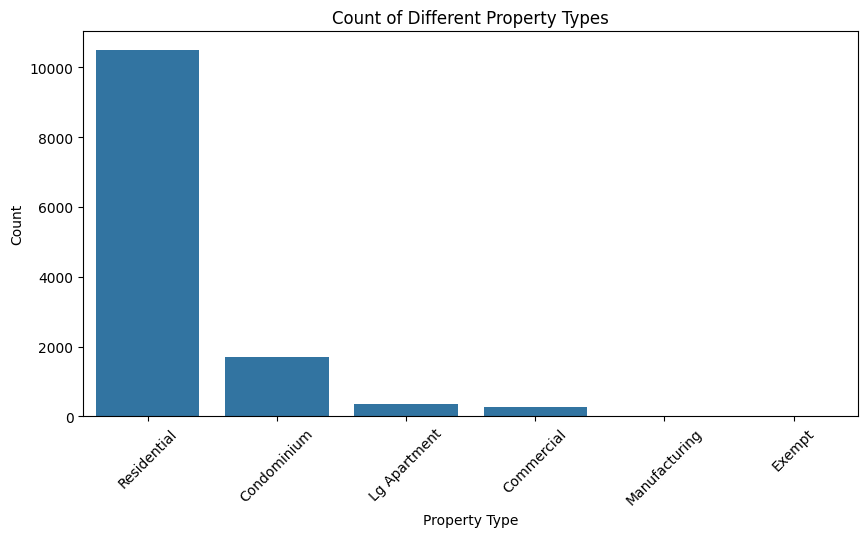

In [37]:
# proptype categories count
prop_type_counts = df["PropType"].value_counts()
print(prop_type_counts)

# visualize
plt.figure(figsize=(10, 5))
sns.barplot(x=prop_type_counts.index, y=prop_type_counts.values)
plt.title("Count of Different Property Types")
plt.xlabel("Property Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True, linestyle=" ", alpha=0.7)
plt.show()

<ipython-input-38-26855a3991d4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Property_Age"] = 2024 - df["Year_Built"]


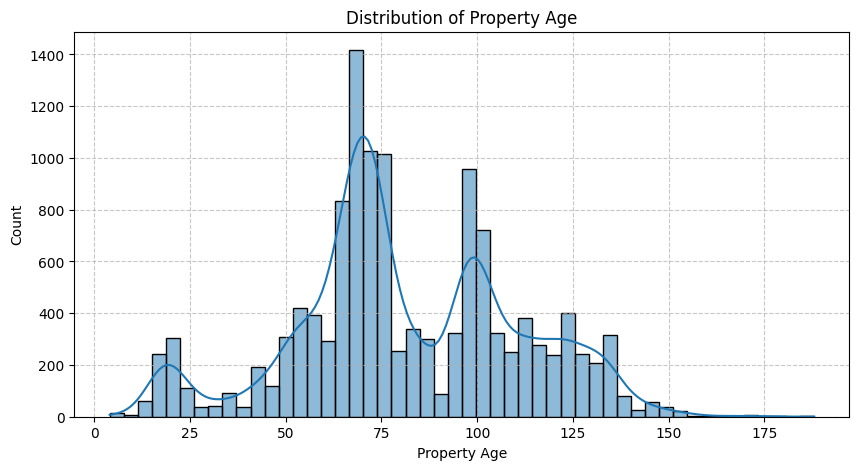

In [38]:
# feature engineering
# creating new column "Property_Age"
df = df[df["Year_Built"] != 0]
df["Property_Age"] = 2024 - df["Year_Built"]

plt.figure(figsize=(10, 5))
sns.histplot(df["Property_Age"], bins=50, kde=True)
plt.title("Distribution of Property Age")
plt.xlabel("Property Age")
plt.ylabel("Count")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

In [39]:
# feature engineering
# splitting property type into focusing on residential and commercial
df["Residential"] = (df["PropType"] == "Residential").astype(int)
df["Commercial"] = (df["PropType"] == "Commercial").astype(int)
df["Condominium"] = (df["PropType"] == "Condominium").astype(int)

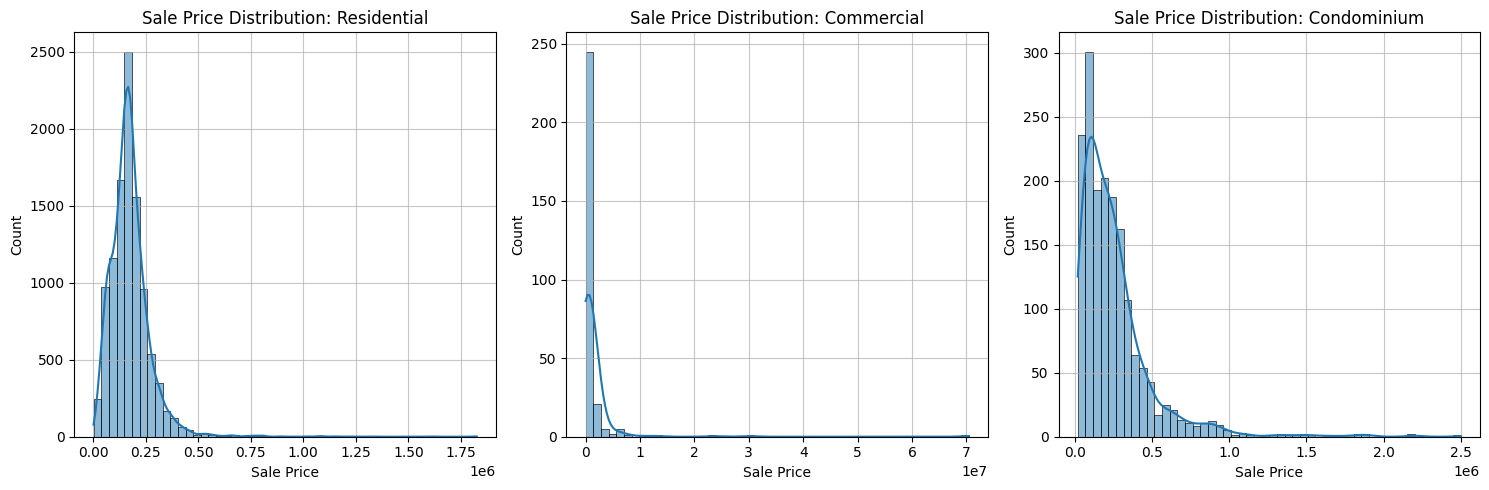

In [40]:
# visualizing the distribution of sale price for commercial and residential properties
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# residential distribution
sns.histplot(df[df["Residential"] == 1]["Sale_price"], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Sale Price Distribution: Residential")
axes[0].set_xlabel("Sale Price")
axes[0].set_ylabel("Count")
axes[0].grid(True, linestyle="-", alpha=0.7)

# commercial distribution
sns.histplot(df[df["Commercial"] == 1]["Sale_price"], bins=50, kde=True, ax=axes[1])
axes[1].set_title("Sale Price Distribution: Commercial")
axes[1].set_xlabel("Sale Price")
axes[1].set_ylabel("Count")
axes[1].grid(True, linestyle="-", alpha=0.7)

# condominium distribution
sns.histplot(df[df["Condominium"] == 1]["Sale_price"], bins=50, kde=True, ax=axes[2])
axes[2].set_title("Sale Price Distribution: Condominium")
axes[2].set_xlabel("Sale Price")
axes[2].set_ylabel("Count")
axes[2].grid(True, linestyle="-", alpha=0.7)

plt.tight_layout()
plt.show()

In [41]:
df_uncapped = df[df["Sale_price"] <= 1_000_000]

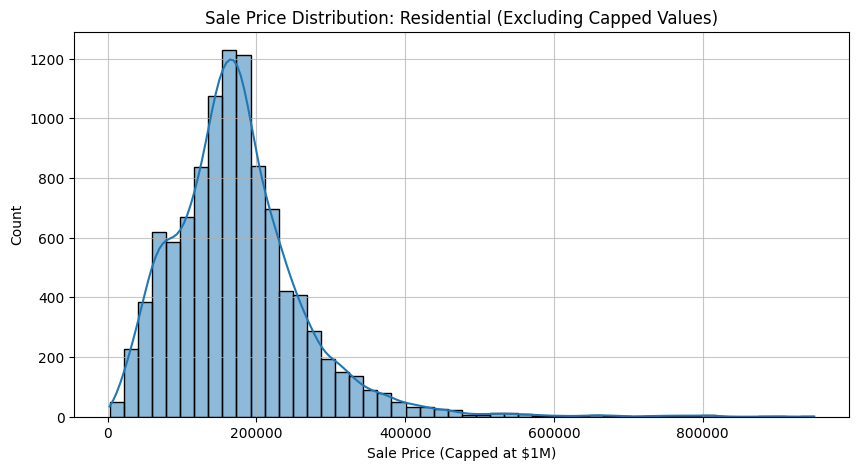

In [42]:
# cap sale prices at $1M
df["Capped_Sale_Price"] = np.where(df["Sale_price"] > 1_000_000, 1_000_000, df["Sale_price"])
df_uncapped = df[df["Sale_price"] <= 1_000_000]

# Plot for residential
plt.figure(figsize=(10, 5))
sns.histplot(df_uncapped[df_uncapped["Residential"] == 1]["Sale_price"], bins=50, kde=True)
plt.title("Sale Price Distribution: Residential (Excluding Capped Values)")
plt.xlabel("Sale Price (Capped at $1M)")
plt.ylabel("Count")
plt.grid(True, linestyle="-", alpha=0.7)
plt.show()

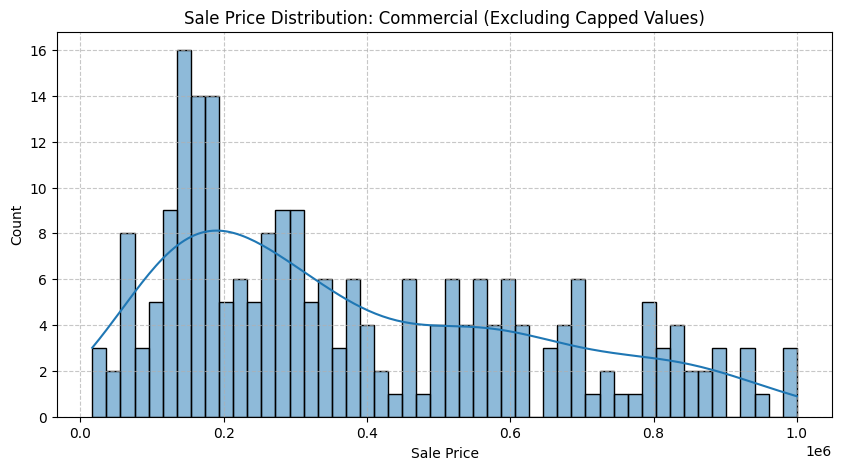

In [43]:
# plot for commercial
plt.figure(figsize=(10, 5))
sns.histplot(df_uncapped[df_uncapped["Commercial"] == 1]["Sale_price"], bins=50, kde=True)
plt.title("Sale Price Distribution: Commercial (Excluding Capped Values)")
plt.xlabel("Sale Price")
plt.ylabel("Count")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

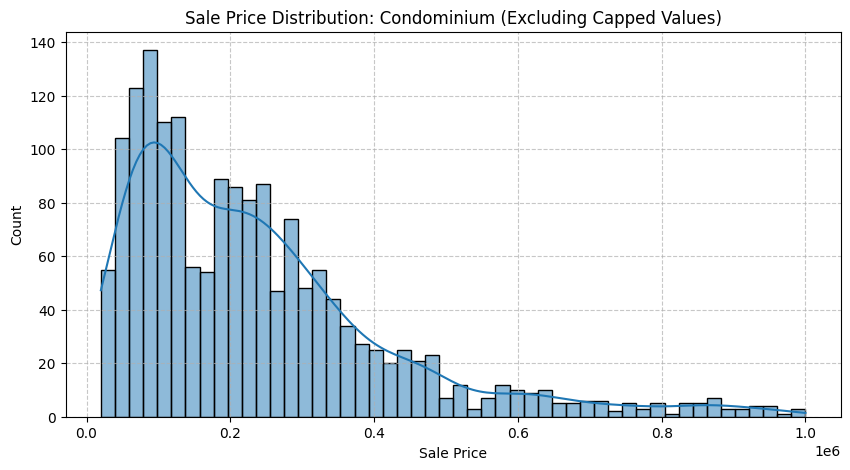

In [44]:
# plot for condo
plt.figure(figsize=(10, 5))
sns.histplot(df_uncapped[df_uncapped["Condominium"] == 1]["Sale_price"], bins=50, kde=True)
plt.title("Sale Price Distribution: Condominium (Excluding Capped Values)")
plt.xlabel("Sale Price")
plt.ylabel("Count")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

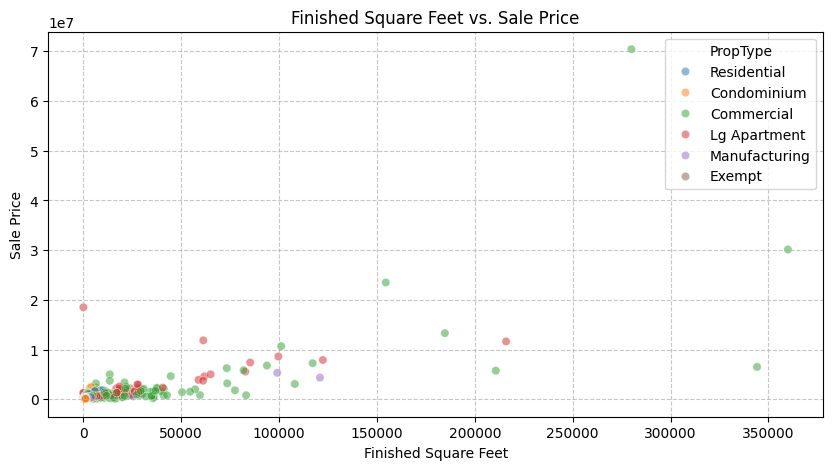

In [45]:
# scatterplot finishedsqft vs sale price
df_filtered = df[df["Sale_price"] <= 1_200_000]
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="FinishedSqft", y="Sale_price", hue="PropType", alpha=0.5)
plt.title("Finished Square Feet vs. Sale Price")
plt.xlabel("Finished Square Feet")
plt.ylabel("Sale Price")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

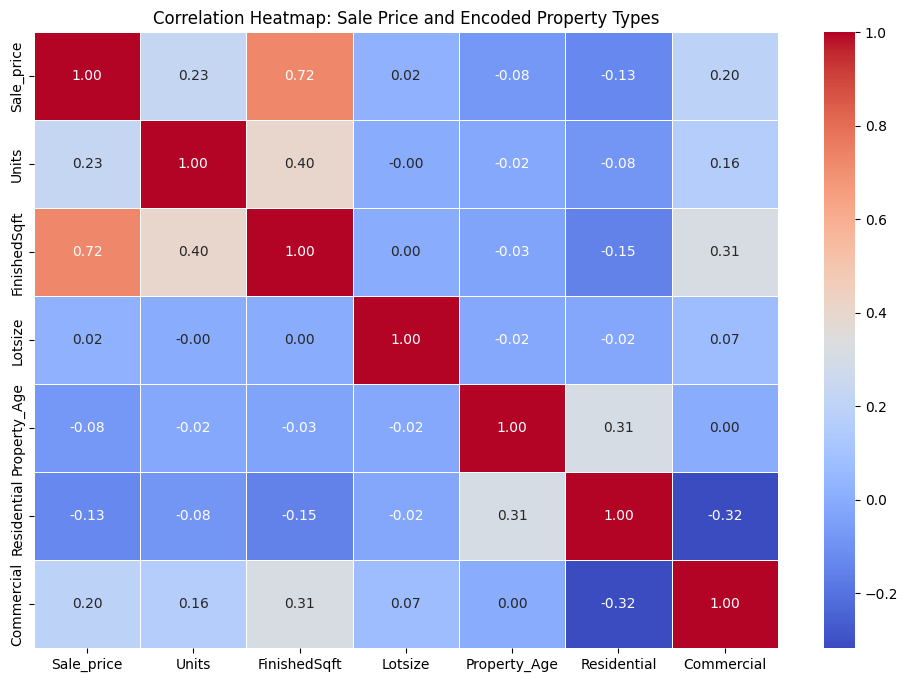

In [46]:
# correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[["Sale_price", "Units", "FinishedSqft", "Lotsize", "Property_Age", "Residential", "Commercial"]].corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Sale Price and Encoded Property Types")
plt.show()

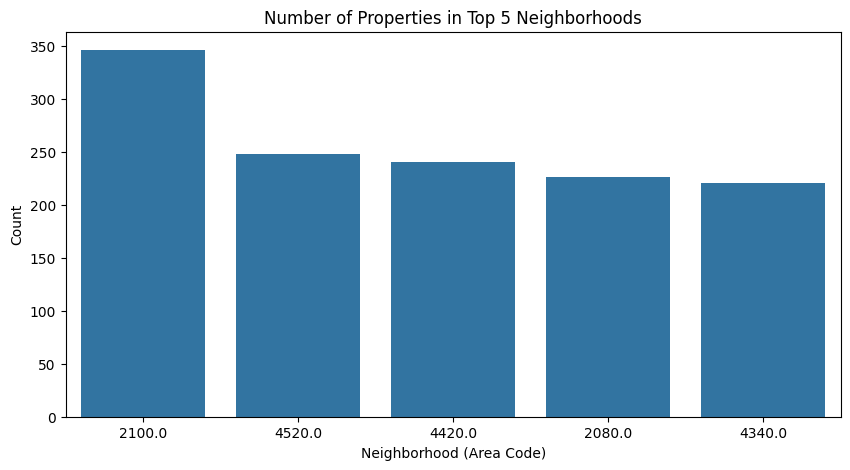

In [47]:
#top 5 neighborhood with most properties
top_5_nbhd = df["nbhd"].value_counts().head(5).index
df_top_5_nbhd = df[df["nbhd"].isin(top_5_nbhd)]

# countplot top 5 neighborhood (area code)
plt.figure(figsize=(10, 5))
sns.countplot(x="nbhd", data=df_top_5_nbhd, order=top_5_nbhd)
plt.title("Number of Properties in Top 5 Neighborhoods")
plt.xlabel("Neighborhood (Area Code)")
plt.ylabel("Count")
plt.grid(True, linestyle="", alpha=0.7)
plt.show()

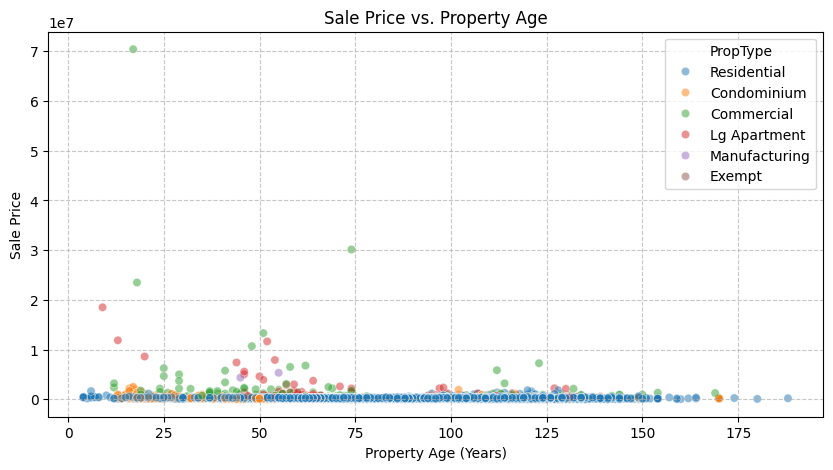

In [48]:
# Scatter plot of Property Age vs. Sale Price
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="Property_Age", y="Sale_price", hue="PropType", alpha=0.5)
plt.title("Sale Price vs. Property Age")
plt.xlabel("Property Age (Years)")
plt.ylabel("Sale Price")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

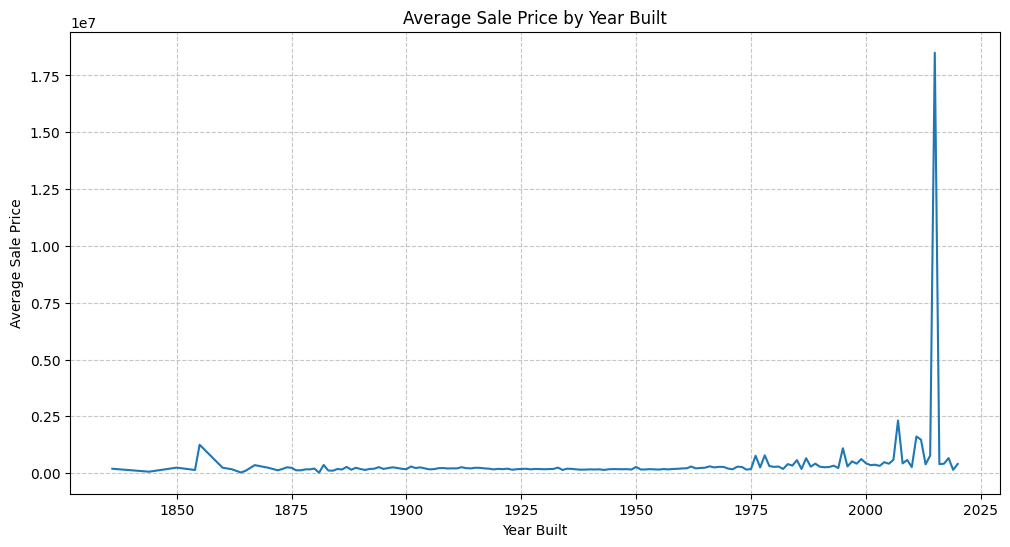

In [49]:
# plotting average sale price of properties by year built
df = df[df["Year_Built"] > 0]
avg_price_by_year = df.groupby("Year_Built")["Sale_price"].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_price_by_year.index, y=avg_price_by_year.values)
plt.title("Average Sale Price by Year Built")
plt.xlabel("Year Built")
plt.ylabel("Average Sale Price")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

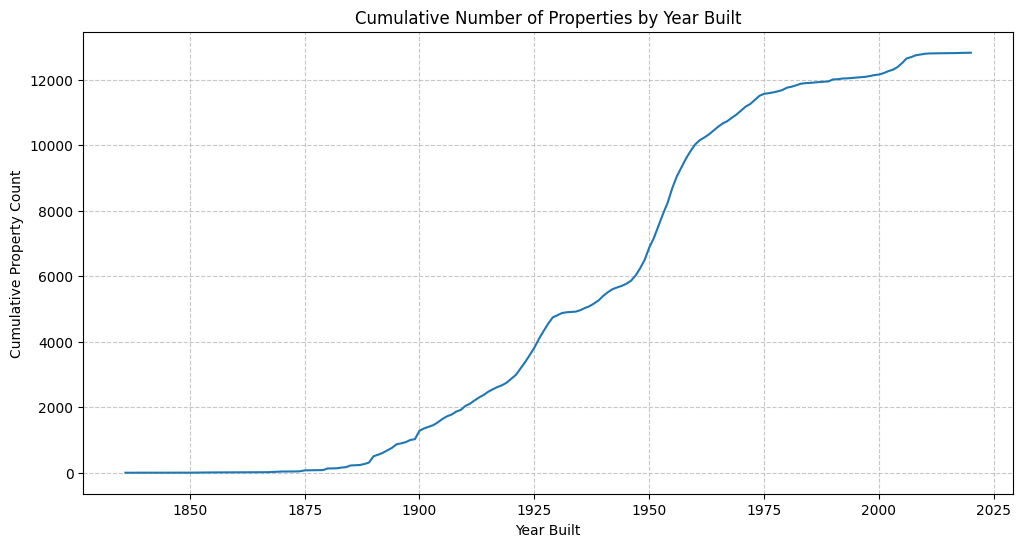

In [50]:
# plot properties count by year_built
cumulative_properties = df.groupby("Year_Built").size().cumsum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=cumulative_properties.index, y=cumulative_properties.values)
plt.title("Cumulative Number of Properties by Year Built")
plt.xlabel("Year Built")
plt.ylabel("Cumulative Property Count")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

In [51]:
df.columns

Index(['PropertyID', 'PropType', 'taxkey', 'Address', 'District', 'nbhd',
       'Extwall', 'Stories', 'Year_Built', 'Rooms', 'FinishedSqft', 'Units',
       'Bdrms', 'Fbath', 'Hbath', 'Lotsize', 'Sale_date', 'Sale_price',
       'Property_Age', 'Residential', 'Commercial', 'Condominium',
       'Capped_Sale_Price'],
      dtype='object')

In [52]:
# range and distribution of year sold
df["Sale_date"] = pd.to_datetime(df["Sale_date"], errors="coerce")

df["Year_Sold"] = df["Sale_date"].dt.year
print(df["Year_Sold"].value_counts().sort_index())

Year_Sold
2020    6338
2021    6485
Name: count, dtype: int64


In [53]:
# properties that are sold more than once (to calculate appreciation)
multiple_sales = df["taxkey"].value_counts()
print(multiple_sales[multiple_sales > 1].head())

taxkey
5360559000.0    16
4331826000.0     4
1920358000.0     3
3490351100.0     3
340313000.0      3
Name: count, dtype: int64


In [54]:
# Ensure the data is correctly sorted
df = df.sort_values(by=["taxkey", "Sale_date"])

In [55]:
# Recalculate appreciation after sorting properly
df["Appreciation"] = df.groupby("taxkey")["Sale_price"].pct_change()
df_appreciation = df.dropna(subset=["Appreciation"])
print(df_appreciation["Year_Sold"].value_counts().sort_index())

Year_Sold
2020     60
2021    275
Name: count, dtype: int64


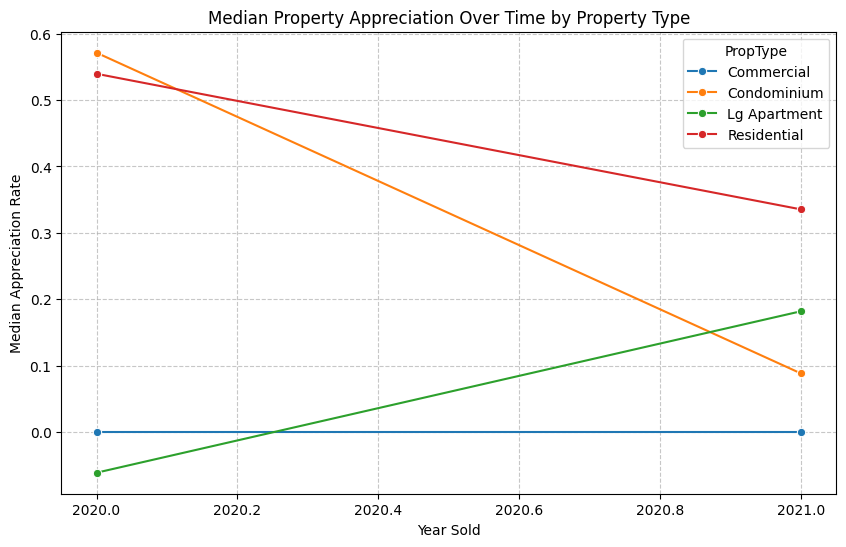

In [56]:
# calculate median appreciation and line plot
median_appreciation = df_appreciation.groupby(["Year_Sold", "PropType"])["Appreciation"].median().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=median_appreciation, x="Year_Sold", y="Appreciation", hue="PropType", marker="o")
plt.title("Median Property Appreciation Over Time by Property Type")
plt.xlabel("Year Sold")
plt.ylabel("Median Appreciation Rate")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

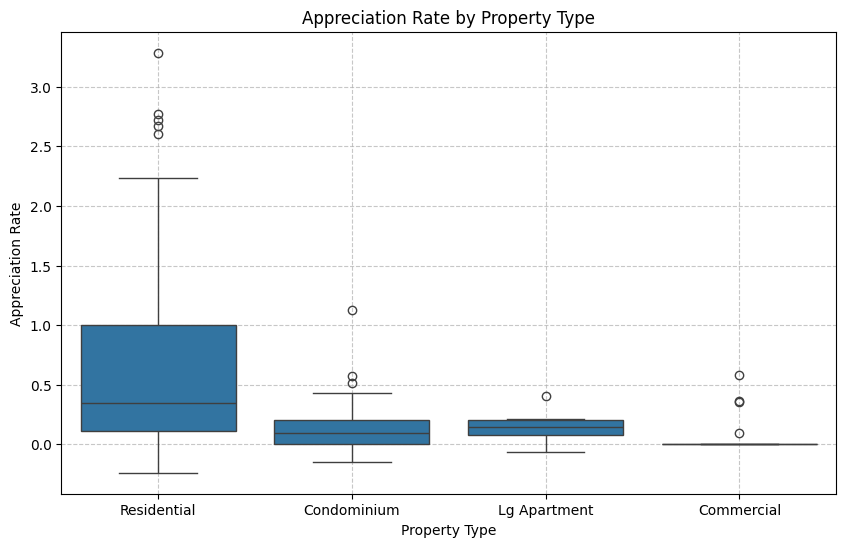

In [57]:
# boxplot of appreciation distribution by property type
plt.figure(figsize=(10, 6))
sns.boxplot(x="PropType", y="Appreciation", data=df_appreciation)
plt.title("Appreciation Rate by Property Type")
plt.xlabel("Property Type")
plt.ylabel("Appreciation Rate")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

**Training the Dataset for sale price prediction**

In [58]:
# Import models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [59]:
df.columns

Index(['PropertyID', 'PropType', 'taxkey', 'Address', 'District', 'nbhd',
       'Extwall', 'Stories', 'Year_Built', 'Rooms', 'FinishedSqft', 'Units',
       'Bdrms', 'Fbath', 'Hbath', 'Lotsize', 'Sale_date', 'Sale_price',
       'Property_Age', 'Residential', 'Commercial', 'Condominium',
       'Capped_Sale_Price', 'Year_Sold', 'Appreciation'],
      dtype='object')

In [60]:
df = df.drop(columns=["Appreciation"])

PropType
Residential      10469
Condominium       1705
Lg Apartment       357
Commercial         284
Manufacturing        4
Exempt               4
Name: count, dtype: int64


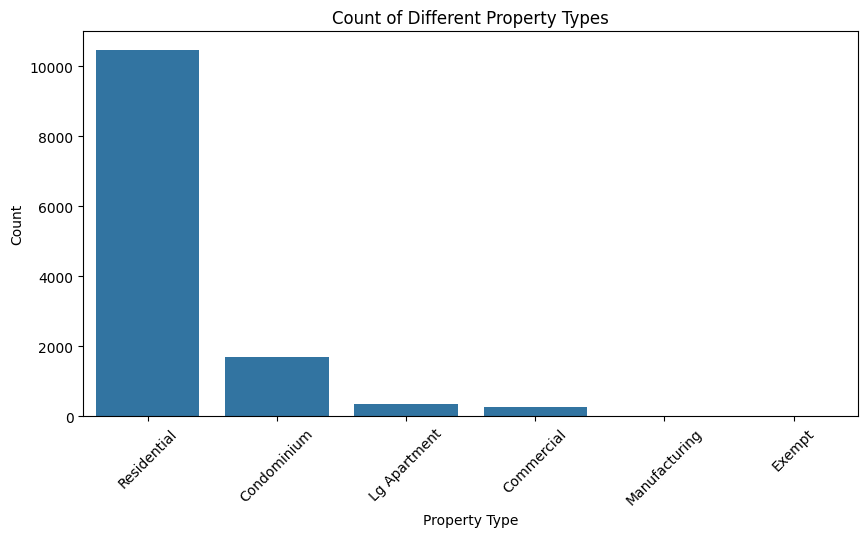

In [61]:
# proptype categories count
prop_type_counts = df["PropType"].value_counts()
print(prop_type_counts)

# visualize
plt.figure(figsize=(10, 5))
sns.barplot(x=prop_type_counts.index, y=prop_type_counts.values)
plt.title("Count of Different Property Types")
plt.xlabel("Property Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True, linestyle=" ", alpha=0.7)
plt.show()

In [62]:
# Define featuers and target variable
selected_columns = ["Sale_price", "PropType", "Year_Built", "Rooms", "FinishedSqft",
                    "Units", "Bdrms", "Fbath", "Hbath", "Lotsize"]
df = df[selected_columns].copy()

# Store models and metrics for each property type
models = {}
metrics = {}

# Selecting models for training
model_types = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Loop through each property type to train and evaluate models
for prop_type in df["PropType"].unique():
    df_type = df[df["PropType"] == prop_type].copy()
    X = df_type.drop(columns=["PropType", "Sale_price"])
    y = df_type["Sale_price"]

    # Train-test split for each property type
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Dictionary to store metrics for this property type
    metrics[prop_type] = {}

    for model_name, model in model_types.items():
        # Train the model
        model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test)

        # Store model and performance metrics
        if prop_type not in models:
            models[prop_type] = {}
        models[prop_type][model_name] = model

        # Calculate and store evaluation metrics
        r2 = r2_score(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        mae = mean_absolute_error(y_test, y_pred)

        # Store metrics
        metrics[prop_type][model_name] = {"R²": r2, "RMSE": rmse, "MAE": mae}

        # Print performance for each model on each property type
        print(f"Results for Property Type: {prop_type} with {model_name}")
        print(" R²:", r2)
        print(" RMSE:", rmse)
        print(" MAE:", mae)
        print("\n")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Results for Property Type: Commercial with Random Forest
 R²: 0.46587475232083875
 RMSE: 6790962.32195971
 MAE: 1377497.179356725


Results for Property Type: Commercial with Linear Regression
 R²: 0.3866837318661823
 RMSE: 7276993.877201577
 MAE: 1583398.2231047598


Results for Property Type: Commercial with Gradient Boosting
 R²: 0.5969099139855618
 RMSE: 5899440.5051482115
 MAE: 1272348.3121719167




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Results for Property Type: Residential with Random Forest
 R²: 0.43697698216881375
 RMSE: 70180.69253904752
 MAE: 51452.28368002683


Results for Property Type: Residential with Linear Regression
 R²: 0.43443946733184857
 RMSE: 70338.66507254251
 MAE: 53212.75184683826




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Results for Property Type: Residential with Gradient Boosting
 R²: 0.463069516407528
 RMSE: 68535.18745140085
 MAE: 50974.06329513918




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Results for Property Type: Condominium with Random Forest
 R²: 0.870530222742381
 RMSE: 95400.4601013584
 MAE: 41872.48380859642


Results for Property Type: Condominium with Linear Regression
 R²: 0.7110848824804106
 RMSE: 142511.989279597
 MAE: 90415.86098994619




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Results for Property Type: Condominium with Gradient Boosting
 R²: 0.8391322601234332
 RMSE: 106341.00219207101
 MAE: 59727.7333061968




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Results for Property Type: Lg Apartment with Random Forest
 R²: 0.5541607974726718
 RMSE: 1581478.511492662
 MAE: 298993.0314484127


Results for Property Type: Lg Apartment with Linear Regression
 R²: 0.4273214335431369
 RMSE: 1792378.1179295008
 MAE: 373433.5093887667


Results for Property Type: Lg Apartment with Gradient Boosting
 R²: 0.6590279056725572
 RMSE: 1383036.326140201
 MAE: 277419.0017931456




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1

Results for Property Type: Manufacturing with Random Forest
 R²: nan
 RMSE: 2302795.0
 MAE: 2302795.0


Results for Property Type: Manufacturing with Linear Regression
 R²: nan
 RMSE: 5470168.199357271
 MAE: 5470168.199357271


Results for Property Type: Manufacturing with Gradient Boosting
 R²: nan
 RMSE: 2991496.8833974525
 MAE: 2991496.8833974525


Results for Property Type: Exempt with Random Forest
 R²: nan
 RMSE: 96650.0
 MAE: 96650.0


Results for Property Type: Exempt with Linear Regression
 R²: nan
 RMSE: 1114283.2261457294
 MAE: 1114283.2261457294


Results for Property Type: Exempt with Gradient Boosting
 R²: nan
 RMSE: 128998.46829266413
 MAE: 128998.46829266413




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1

In [71]:
# Summary table
expanded_metrics = pd.DataFrame()

for model in metrics_df.index:
    model_data = pd.DataFrame(metrics_df.loc[model].apply(pd.Series).stack()).T
    model_data['Model'] = model
    expanded_metrics = pd.concat([expanded_metrics, model_data])
expanded_metrics.reset_index(drop=True, inplace=True)
display(expanded_metrics)

Commercial                             Residential                \
          R²          RMSE           MAE          R²          RMSE   
0   0.465875  6.790962e+06  1.377497e+06    0.436977  70180.692539   
1   0.386684  7.276994e+06  1.583398e+06    0.434439  70338.665073   
2   0.596910  5.899441e+06  1.272348e+06    0.463070  68535.187451   

                Condominium                              Lg Apartment  \
            MAE          R²           RMSE           MAE           R²   
0  51452.283680    0.870530   95400.460101  41872.483809     0.554161   
1  53212.751847    0.711085  142511.989280  90415.860990     0.427321   
2  50974.063295    0.839132  106341.002192  59727.733306     0.659028   

                               Manufacturing                      Exempt  \
           RMSE            MAE          RMSE           MAE          RMSE   
0  1.581479e+06  298993.031448  2.302795e+06  2.302795e+06  9.665000e+04   
1  1.792378e+06  373433.509389  5.470168e+06  5.470168e+06  1.114283e+06   
2  1.383036e+06  277419.001793  2.991497e+06  2.991497e+06  1.289985e+05   

                             Model  
            MAE                     
0  9.665000e+04      Random Forest  
1  1.114283e+06  Linear Regression  
2  1.289985e+05  Gradient Boosting

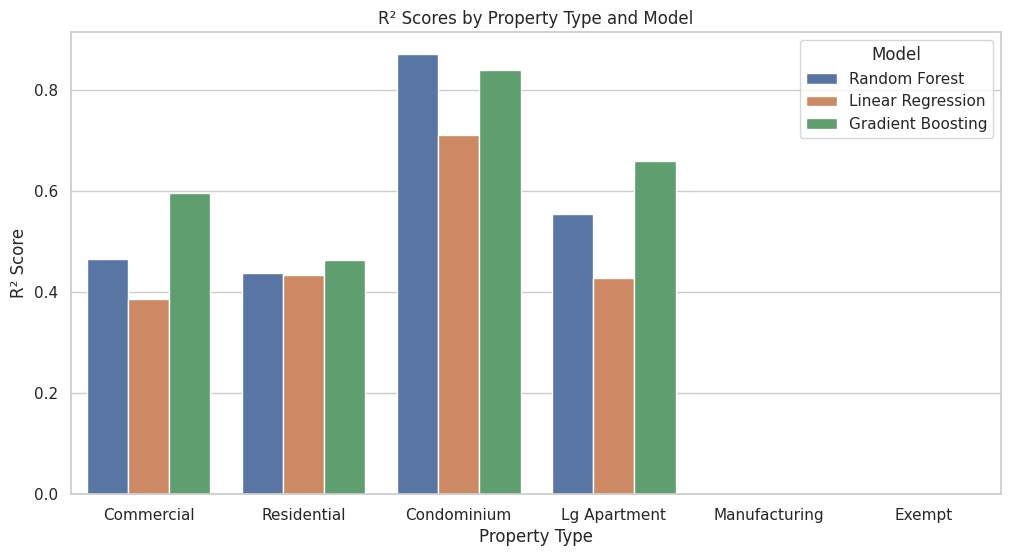

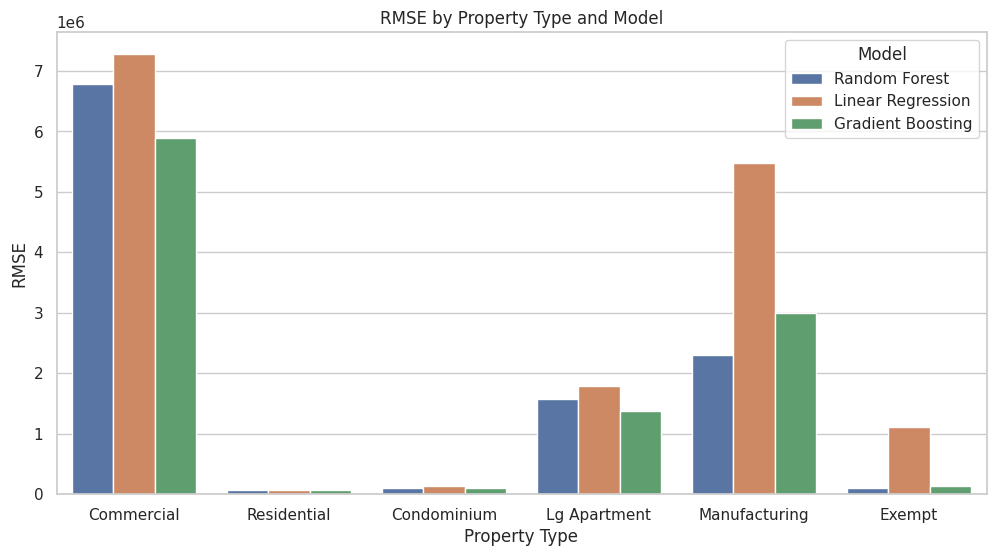

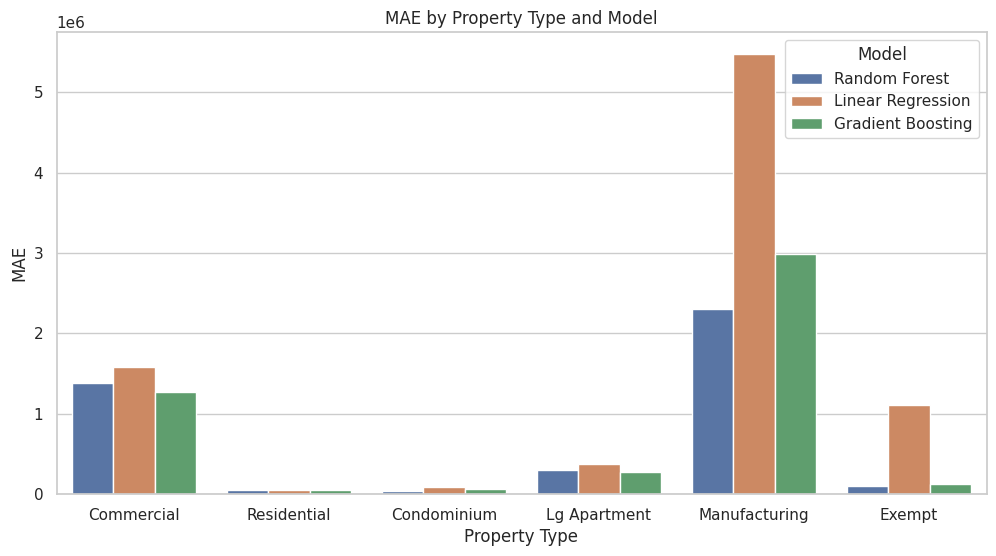

In [63]:
# convert metrics dictionary to a DataFrame
metrics_list = []
for prop_type, model_metrics in metrics.items():
    for model_name, metric_values in model_metrics.items():
        metrics_list.append({
            'Property_Type': prop_type,
            'Model': model_name,
            'R²': metric_values["R²"],
            'RMSE': metric_values["RMSE"],
            'MAE': metric_values["MAE"]
        })
metrics_df = pd.DataFrame(metrics_list)

# Plotting the metrics result
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(data=metrics_df, x="Property_Type", y="R²", hue="Model")
plt.title("R² Scores by Property Type and Model")
plt.xlabel("Property Type")
plt.ylabel("R² Score")
plt.legend(title="Model")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=metrics_df, x="Property_Type", y="RMSE", hue="Model")
plt.title("RMSE by Property Type and Model")
plt.xlabel("Property Type")
plt.ylabel("RMSE")
plt.legend(title="Model")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=metrics_df, x="Property_Type", y="MAE", hue="Model")
plt.title("MAE by Property Type and Model")
plt.xlabel("Property Type")
plt.ylabel("MAE")
plt.legend(title="Model")
plt.show()

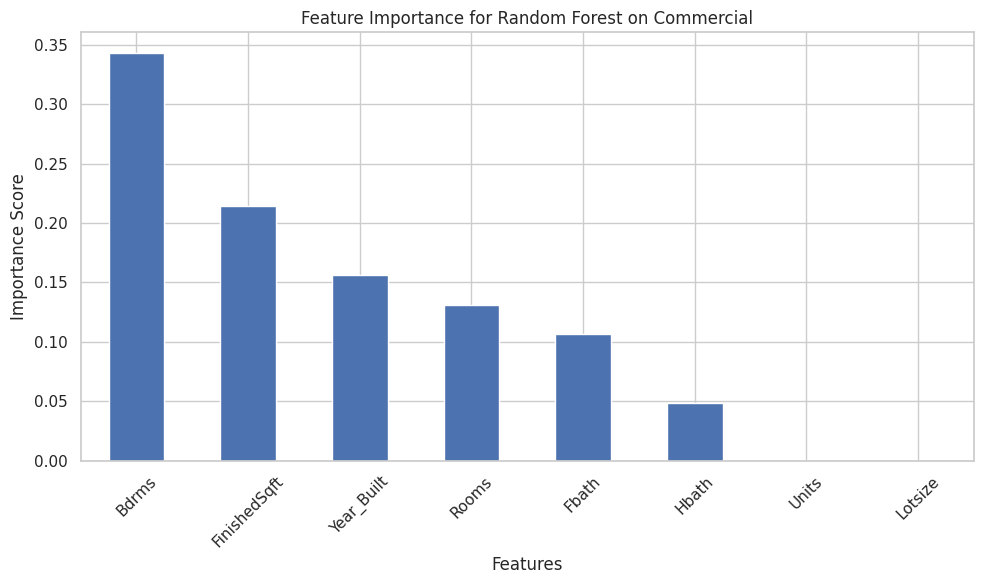

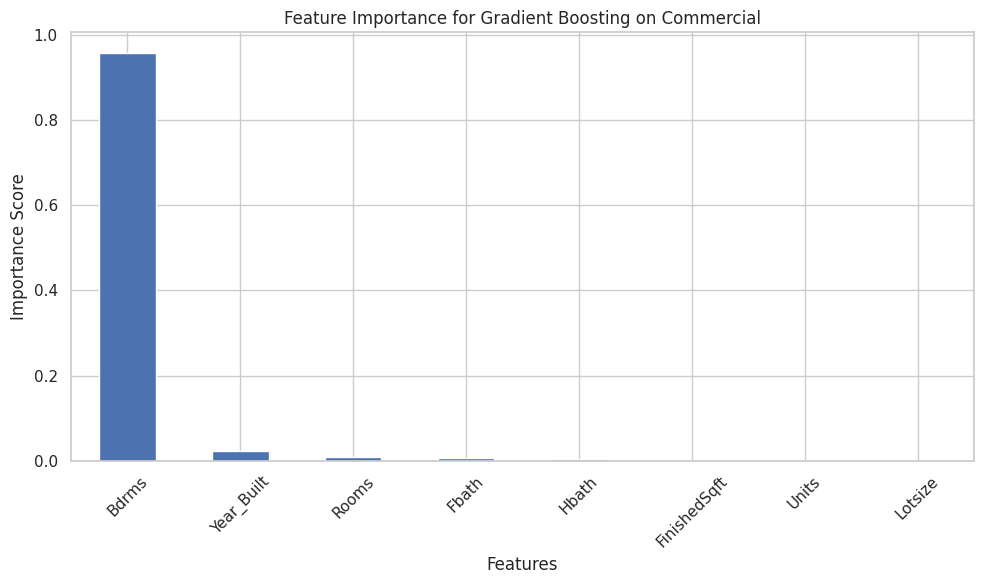

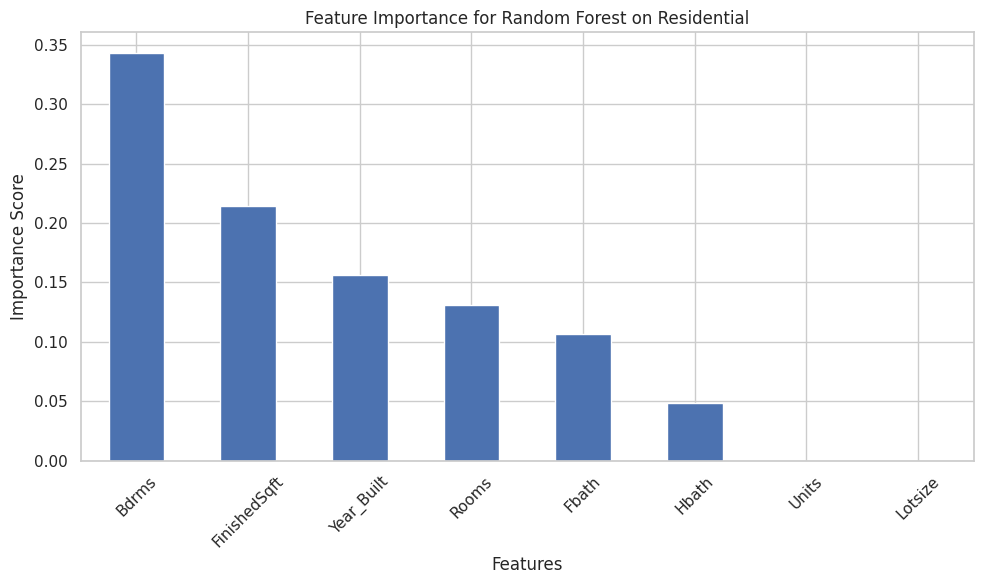

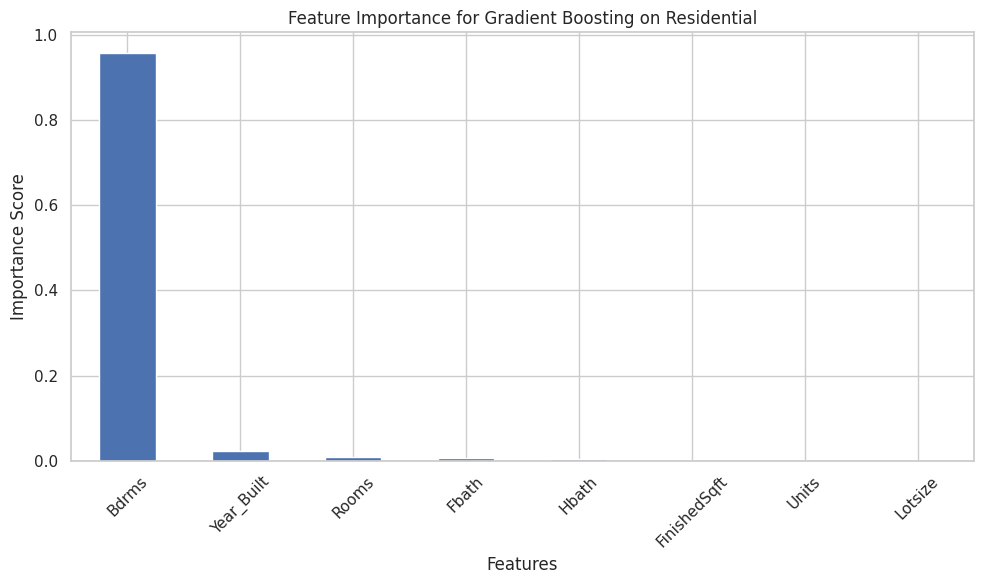

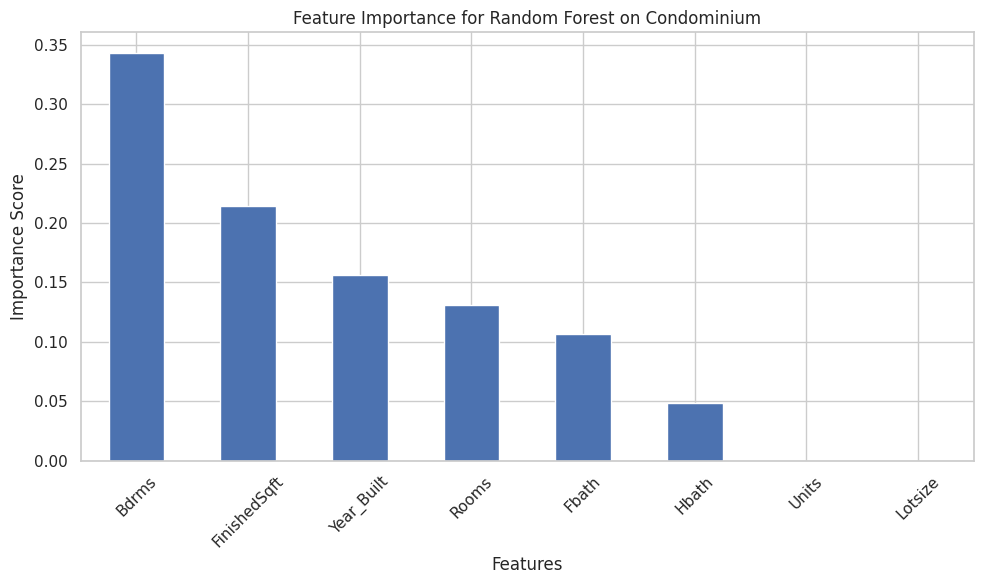

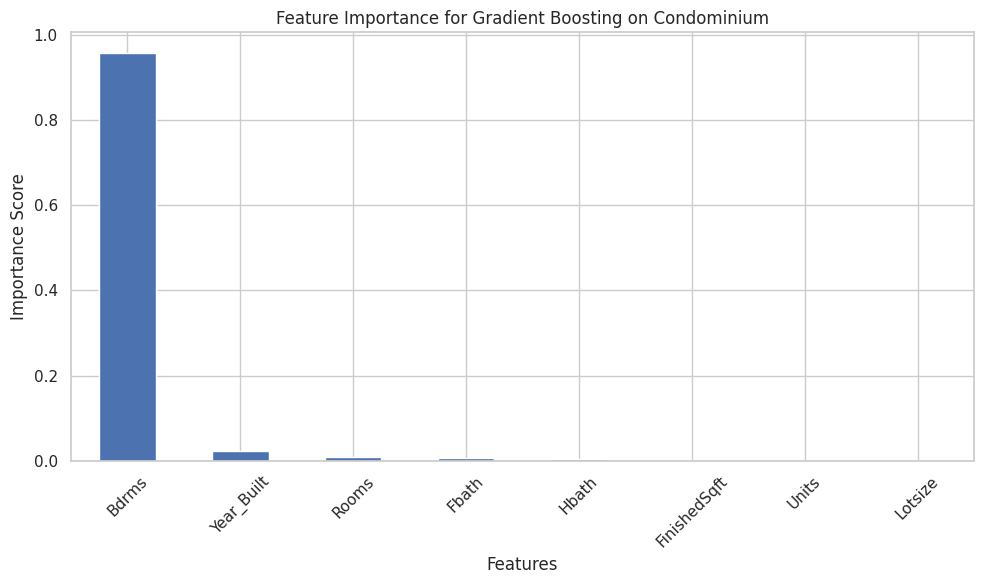

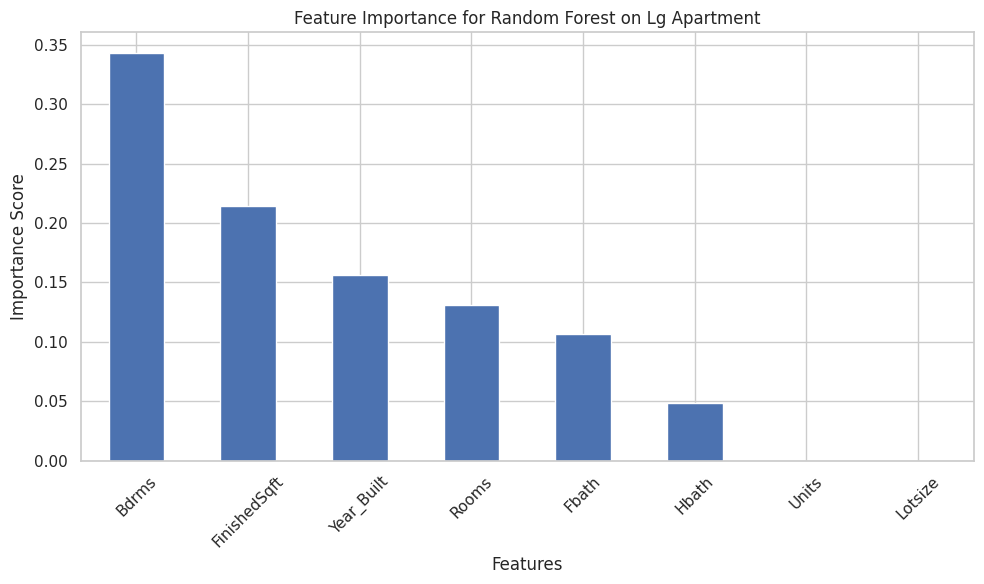

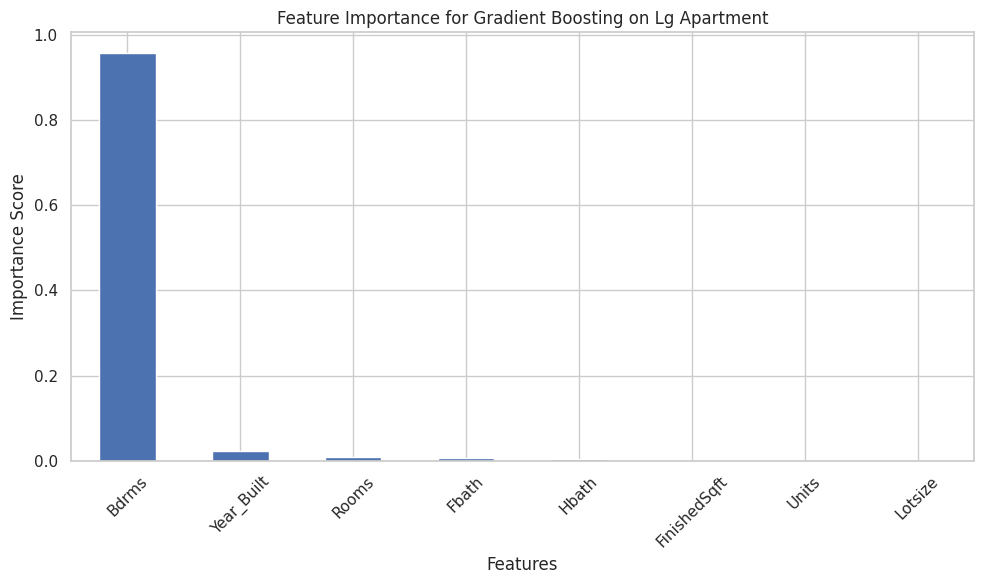

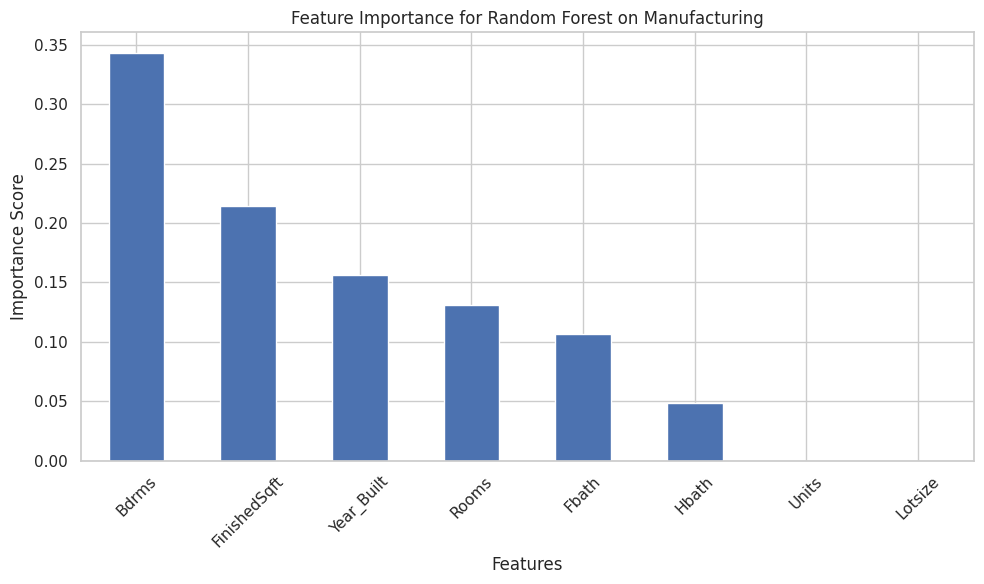

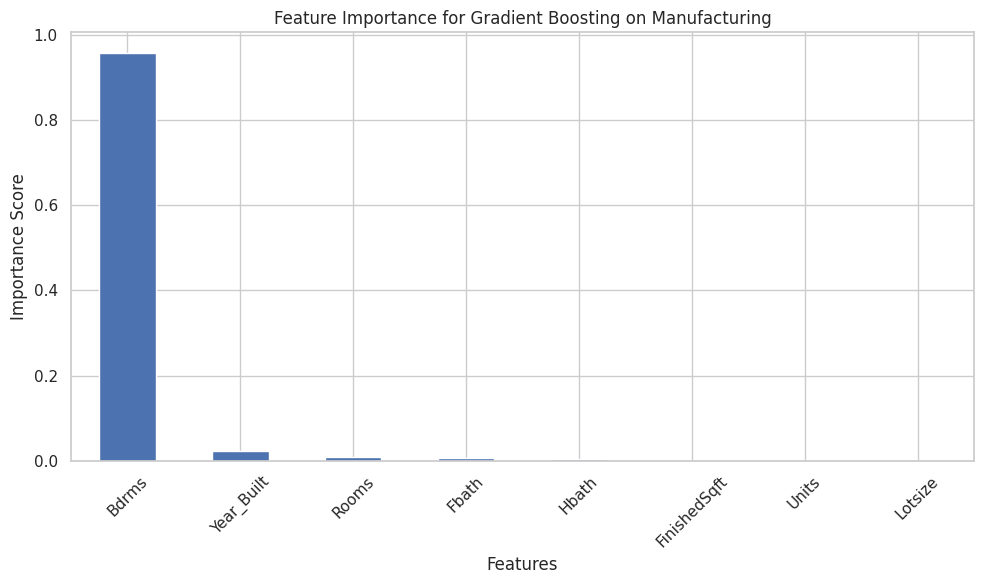

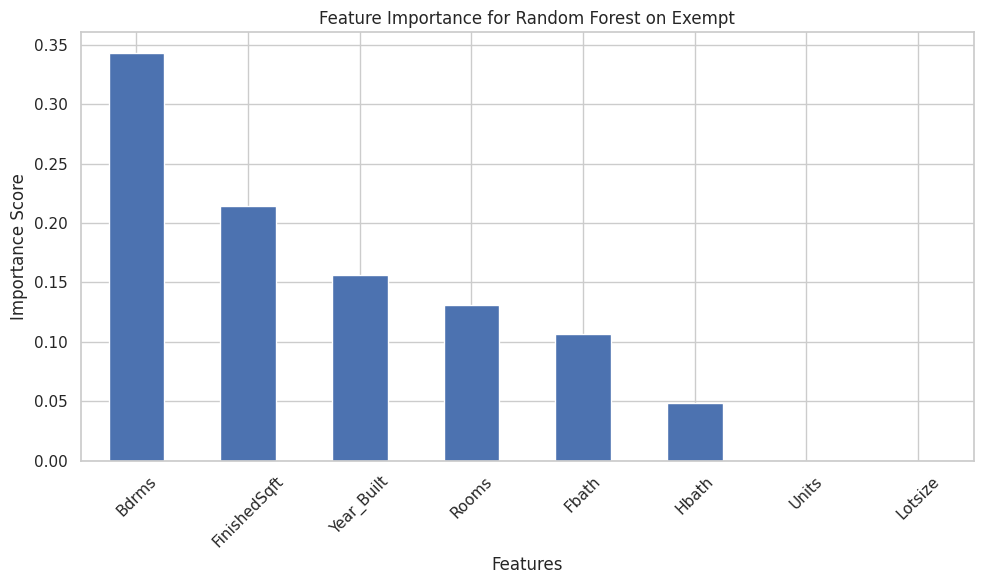

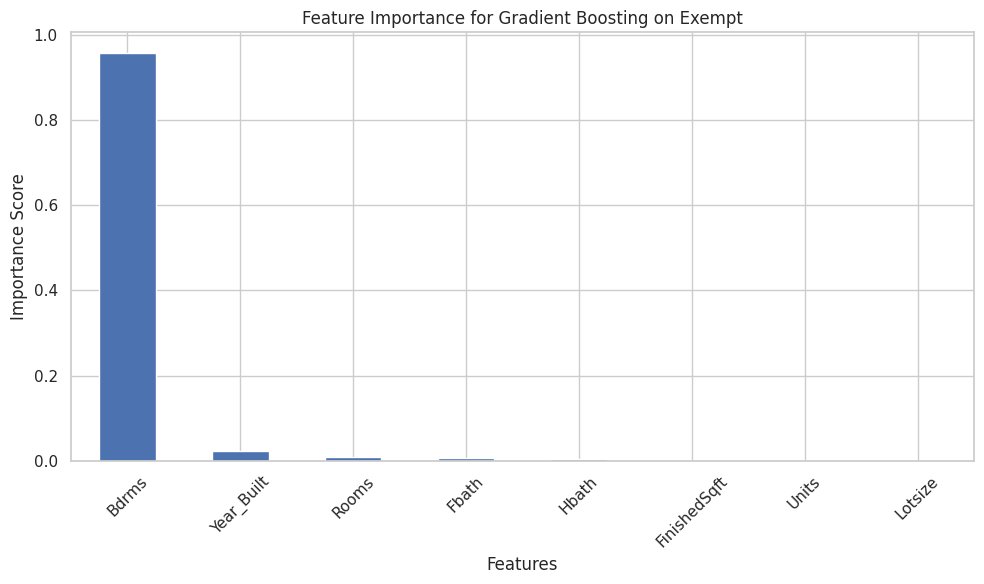

In [64]:
# feature importance for Random Forest and Gradient Boosting
for prop_type, prop_models in models.items():
    for model_name, model in prop_models.items():
        if model_name in ["Random Forest", "Gradient Boosting"]:
            feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

            # Plot feature importance
            plt.figure(figsize=(10, 6))
            feature_importances.plot(kind="bar")
            plt.title(f"Feature Importance for {model_name} on {prop_type}")
            plt.xlabel("Features")
            plt.ylabel("Importance Score")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()